In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

11493376/11490434 [==============================] - 0s 0us/step


In [12]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

Model: "model_35"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_37 (InputLayer)           [(None, 784)]        0                                            
__________________________________________________________________________________________________
model_32 (Functional)           (None, 32)           332936      input_37[0][0]                   
__________________________________________________________________________________________________
model_33 (Functional)           (None, 32)           332936      input_37[0][0]                   
__________________________________________________________________________________________________
model_34 (Functional)           (None, 32)           332936      input_37[0][0]                   
___________________________________________________________________________________________

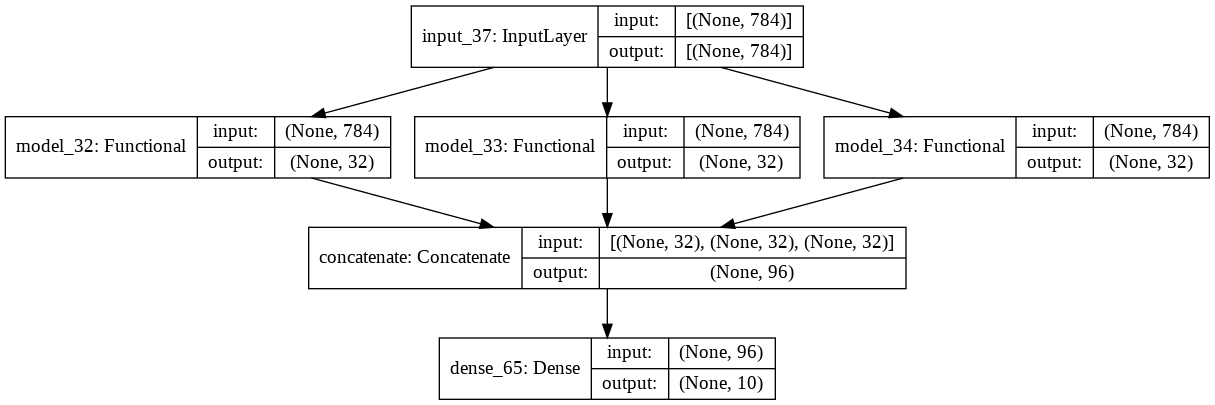

In [17]:
def get_model():
    inputs = keras.Input(shape=(784,))
    x = layers.Dense(360)(inputs)
    x = layers.Dense(128)(x)
    outputs = layers.Dense(32)(x)
    return keras.Model(inputs, outputs)


model1 = get_model()
model2 = get_model()
model3 = get_model()

inputs = keras.Input(shape=(784,))
y1 = model1(inputs)
y2 = model2(inputs)
y3 = model3(inputs)
y = layers.concatenate([y1, y2, y3])
outputs = layers.Dense(10)(y)
ensemble_model = keras.Model(inputs=inputs, outputs=outputs)
ensemble_model.summary()
keras.utils.plot_model(ensemble_model, "my_first_model_with_shape_info.png", show_shapes=True)

In [18]:

ensemble_model.compile(optimizer="adam", loss="categorical_crossentropy",metrics=["accuracy"])

history = ensemble_model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.2)

test_scores = ensemble_model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/10
750/750 [==============================] - 10s 13ms/step - loss: 8.2856 - accuracy: 0.1031 - val_loss: 7.9250 - val_accuracy: 0.1053
Epoch 2/10
750/750 [==============================] - 10s 13ms/step - loss: 7.8908 - accuracy: 0.1029 - val_loss: 7.9250 - val_accuracy: 0.1053
Epoch 3/10
750/750 [==============================] - 10s 13ms/step - loss: 7.8908 - accuracy: 0.1029 - val_loss: 7.9250 - val_accuracy: 0.1053
Epoch 4/10
750/750 [==============================] - 10s 13ms/step - loss: 7.8908 - accuracy: 0.1029 - val_loss: 7.9250 - val_accuracy: 0.1053
Epoch 5/10
750/750 [==============================] - 10s 13ms/step - loss: 7.8908 - accuracy: 0.1029 - val_loss: 7.9250 - val_accuracy: 0.1053
Epoch 6/10
750/750 [==============================] - 10s 13ms/step - loss: 7.8908 - accuracy: 0.1029 - val_loss: 7.9250 - val_accuracy: 0.1053
Epoch 7/10
750/750 [==============================] - 10s 13ms/step - loss: 7.8908 - accuracy: 0.1029 - val_loss: 7.9250 - val_accuracy: